<a href="https://colab.research.google.com/github/Rudraashish7/Capstone-Project-SupervisedML-Regression-Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Coronavirus_Tweets_Sentiment_Analysis_Classification_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np                                  # Import NumPy for numerical operations
import pandas as pd                                 # Import Pandas for data manipulation
import matplotlib.pyplot as plt                     # Import Matplotlib for data visualization
import seaborn as sns                               # Import Seaborn for enhanced data visualization
import string                                      # Import string module for handling string operations
from wordcloud import WordCloud                     # Import WordCloud for generating word clouds
import nltk                                       # Import NLTK (Natural Language Toolkit) for NLP tasks
nltk.download('all', quiet=True)                  # Downloading all NLTK data packages (quiet=True to suppress download messages)
from PIL import Image                            # Import the Python Imaging Library (PIL) module for image processing

# Model libraries for classification tasks
from sklearn.metrics import *                   # Import various metrics for model evaluation
from sklearn.model_selection import train_test_split  # Import train_test_split for splitting data into training and testing sets
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression for logistic regression modeling
from sklearn.tree import DecisionTreeClassifier     # Import DecisionTreeClassifier for decision tree modeling
from xgboost import XGBClassifier                 # Import XGBClassifier for XGBoost (extreme gradient boosting) modeling
from sklearn.model_selection import GridSearchCV    # Import GridSearchCV for hyperparameter tuning using cross-validation
from sklearn.svm import SVC                       # Import SVC for support vector machine modeling
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier for k-nearest neighbors modeling

# Metrics and evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report  # Import confusion_matrix and classification_report for model evaluation
from sklearn.model_selection import cross_val_score                    # Import cross_val_score for cross-validation of models

# Suppressing warnings
import warnings                                     # Import warnings module to suppress warning messages
warnings.filterwarnings('ignore')                    # Ignore any warning messages generated during the code execution


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
tweet_df = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT - SUPERVISED LEARNING - CLASSIFICATION/Coronavirus Tweets.csv", encoding='latin-1')

### Dataset First View

In [4]:
# Display the first few rows of the DataFrame with a cool color gradient
# This code uses the 'head()' method to display the first few rows of the DataFrame.
# The 'style.background_gradient()' method applies a color gradient to the background of the DataFrame.
# The 'cmap='cool'' argument specifies the colormap to use.
tweet_df.head().style.background_gradient(cmap='cool')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,nan,16-03-2020,"My food stock is not the only one which is empty... PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. Stay calm, stay safe. #COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,nan,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak. Not because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage... #CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
# Get the shape of the DataFrame
tweet_df.shape

(41157, 6)

In [6]:
# Get the column names of the DataFrame
tweet_df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

### Dataset Information

In [7]:
# Dataset Info
# Display concise summary of the DataFrame
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
# Check for duplicate rows in the DataFrame
num_duplicates = tweet_df.duplicated().sum()
num_duplicates

0

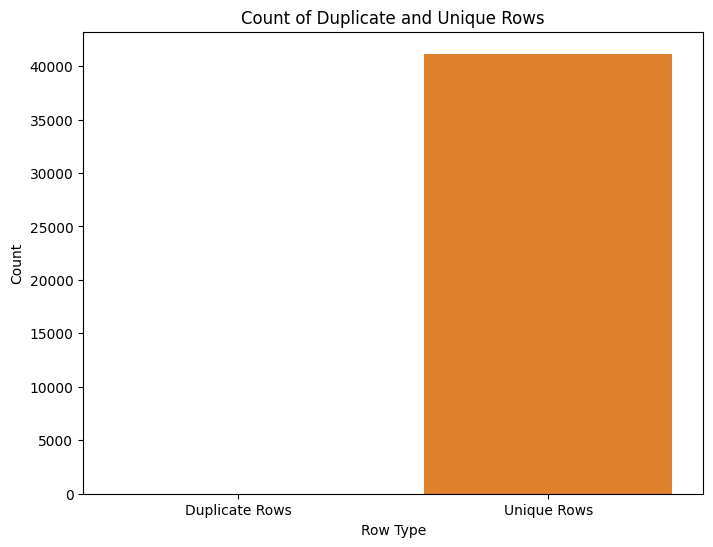

In [9]:
# Create a bar plot to showcase the count of duplicate rows
plt.figure(figsize=(8, 6))
sns.barplot(x=["Duplicate Rows", "Unique Rows"], y=[num_duplicates, len(tweet_df) - num_duplicates])
plt.xlabel("Row Type")
plt.ylabel("Count")
plt.title("Count of Duplicate and Unique Rows")
plt.show()

The dataset used in the analysis is free from duplicate values. All the rows in the dataset are unique, and there are no instances where multiple rows have identical data across all columns. As a result, the dataset provides distinct and non-repetitive information, ensuring that each observation contributes uniquely to the analysis without any duplications.

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
# Check for missing values in the DataFrame
missing_values_count = tweet_df.isna().sum()
missing_values_count

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

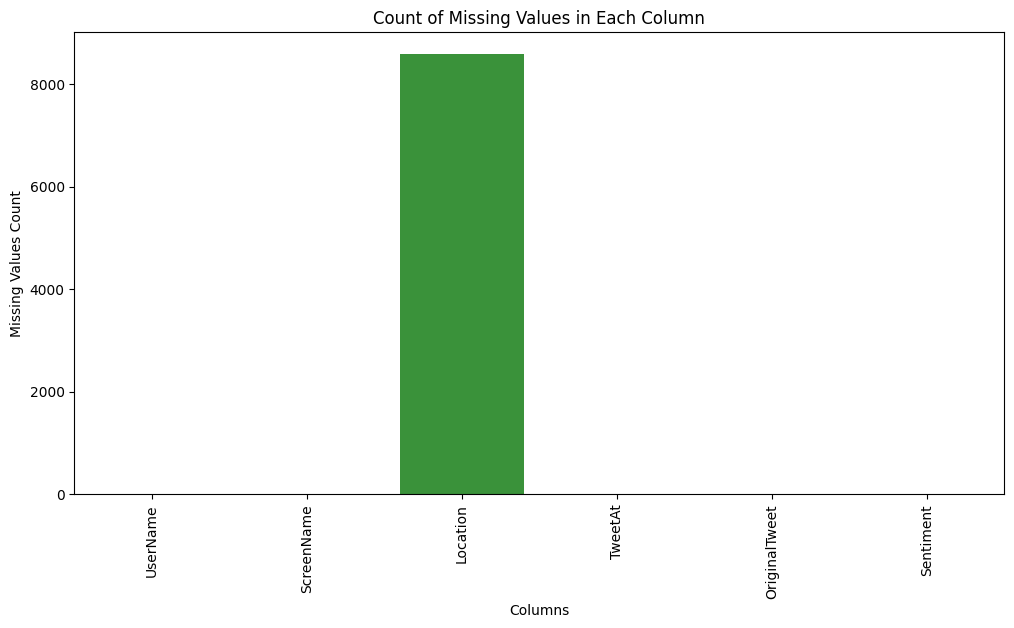

In [11]:
# Visualizing the missing values
# Create a bar plot to showcase the count of missing values in each column
plt.figure(figsize=(12, 6))  # Set the size of the figure for better visualization

# Use the seaborn 'barplot()' function to create the bar plot
# x=missing_values_count.index: Set the x-axis labels using column names (index of the 'missing_values_count' Series).
# y=missing_values_count.values: Set the y-axis values using the count of missing values for each column.
sns.barplot(x=missing_values_count.index, y=missing_values_count.values)

plt.xlabel("Columns")  # Set the x-axis label to "Columns" for column names
plt.ylabel("Missing Values Count")  # Set the y-axis label to "Missing Values Count" for count values
plt.title("Count of Missing Values in Each Column")  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability when there are many columns
plt.show()  # Display the bar plot

### What did you know about your dataset?

In this dataset, there are six columns: 'Location', 'UserName', 'ScreenName', 'TweetAt', 'OriginalTweet', and 'Sentiment'. Among these columns, the 'Location' column contains duplicated values, with a total of 8590 duplicate entries. Identifying and handling these duplicate values will be important for our classification machine learning project to ensure the data is clean and accurate before proceeding with the analysis.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
# Get the column names of the DataFrame
columns = tweet_df.columns
columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [13]:
# Dataset Describe
# Generate descriptive statistics for the DataFrame, including all data types (include='all')
description = tweet_df.describe(include='all').style.background_gradient(cmap='cool')
description

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,nan,nan,12220,30,41157,5
top,nan,nan,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Positive
freq,nan,nan,540,3448,1,11422
mean,24377.000000,69329.000000,nan,nan,nan,nan
std,11881.146851,11881.146851,nan,nan,nan,nan
min,3799.000000,48751.000000,nan,nan,nan,nan
25%,14088.000000,59040.000000,nan,nan,nan,nan
50%,24377.000000,69329.000000,nan,nan,nan,nan
75%,34666.000000,79618.000000,nan,nan,nan,nan


### Variables Description

The dataset under consideration contains information about tweets related to the Coronavirus pandemic. It includes valuable attributes extracted from the tweets, which can aid in understanding public sentiments, opinions, and geographical distribution during the pandemic. The dataset consists of several columns, each holding specific information about the tweets and the users who posted them. The columns include UserName, ScreenName, Location, TweetAt, OriginalTweet, and Sentiment. Let's explore each of these columns to gain insights into the data and better comprehend the characteristics of the tweets in this dataset:


*   UserName: This column contains the username of the person who authored the tweet on Twitter.

*   ScreenName: This column contains the screen name or handle of the Twitter user who posted the tweet.

*   Location: This column represents the location information provided by the Twitter user in their profile. It may include details about their city, state, country, or any other geographic location they have specified.
*   TweetAt: This column stores the date and time when the tweet was posted on Twitter.


*   OriginalTweet: This column contains the actual content of the tweet that was posted by the user.


*   Sentiment: This column contains the sentiment label assigned to the tweet based on the results of a sentiment analysis algorithm. The sentiment label can indicate whether the tweet's content is positive, negative, extremely positive, extremely negative, or neutral, depending on the sentiment analysis results.

The dataset's attributes offer a comprehensive view of the tweets, allowing us to explore public sentiments, identify tweet patterns, and potentially build a classification model to categorize tweets based on their sentiment.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
# Display unique values in each column of the DataFrame

unique_values = tweet_df.apply(lambda col: col.unique())
print(unique_values)

UserName         [3799, 3800, 3801, 3802, 3803, 3804, 3805, 380...
ScreenName       [48751, 48752, 48753, 48754, 48755, 48756, 487...
Location         [London, UK, Vagabonds, nan, ÃT: 36.319708,-8...
TweetAt          [16-03-2020, 17-03-2020, 18-03-2020, 19-03-202...
OriginalTweet    [@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/...
Sentiment        [Neutral, Positive, Extremely Negative, Negati...
dtype: object


In [15]:
# Get the unique sentiment labels present in the 'Sentiment' column and print them
unique_sentiments = tweet_df['Sentiment'].unique()

# Display the unique sentiment labels in the 'Sentiment' column
print("Unique Sentiment Labels:")
print(unique_sentiments)

Unique Sentiment Labels:
['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']


In [16]:
# Get the unique locations present in the 'Location' column and print them
unique_locations = tweet_df['Location'].unique()

# Display the unique locations in the 'Location' column
print("Unique Locations:")
print(unique_locations)

Unique Locations:
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


# 3. ***Data Wrangling***

## Data Wrangling Code

As we are focusing on classifying tweets based on the text in the 'OriginalTweet' column, we do not need to remove null values from the 'Location' column. Retaining the null values in the 'Location' column ensures that we don't lose any potentially valuable information that could be useful for our classification model. Removing null values from 'Location' might lead to a loss of geographic information and could potentially impact the effectiveness of our model in understanding the relationship between tweet content and geographical location. Therefore, we choose to retain the null values in the 'Location' column to preserve all available data for our classification task.

### What all manipulations have you done and insights you found?

Understanding the dataset's structure and contents is crucial for conducting a thorough analysis. To achieve this, several data preparation steps are taken, including:




*  Identifying Column Names: The first step involves identifying the names of each column present in the dataset.

*   Describing Columns: Each column is then described with pertinent details such as data type, possible value ranges, and other relevant information.


*   Defining Variables: In this stage, the variables in the dataset are characterized, including their types (numerical, categorical, etc.) and their respective roles or functions.

*   Verifying Unique Values: The dataset is checked for unique values within each column to identify any potential duplicates.

*   Managing Null Values: It is noted that there is no need to remove or delete the empty values (null values), as they are retained in the analysis.


By conducting these data preparation processes, we gain a comprehensive understanding of the dataset's attributes, enabling us to proceed with the analysis and build effective models for classification or any other desired tasks.

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Univarient Analysis

#### Chart - 1 - Bar Plot - Find peak tweet activity dates to reveal trends.

Most-Tweeted-About Dates of the Year:
    Tweet_Date  Count
0   20-03-2020   3448
1   19-03-2020   3215
2   25-03-2020   2979
3   18-03-2020   2742
4   21-03-2020   2653
5   22-03-2020   2114
6   23-03-2020   2062
7   17-03-2020   1977
8   08-04-2020   1881
9   07-04-2020   1843
10  06-04-2020   1742
11  24-03-2020   1480
12  09-04-2020   1471
13  13-04-2020   1428
14  26-03-2020   1277
15  05-04-2020   1131
16  10-04-2020   1005
17  02-04-2020    954
18  11-04-2020    909
19  03-04-2020    810


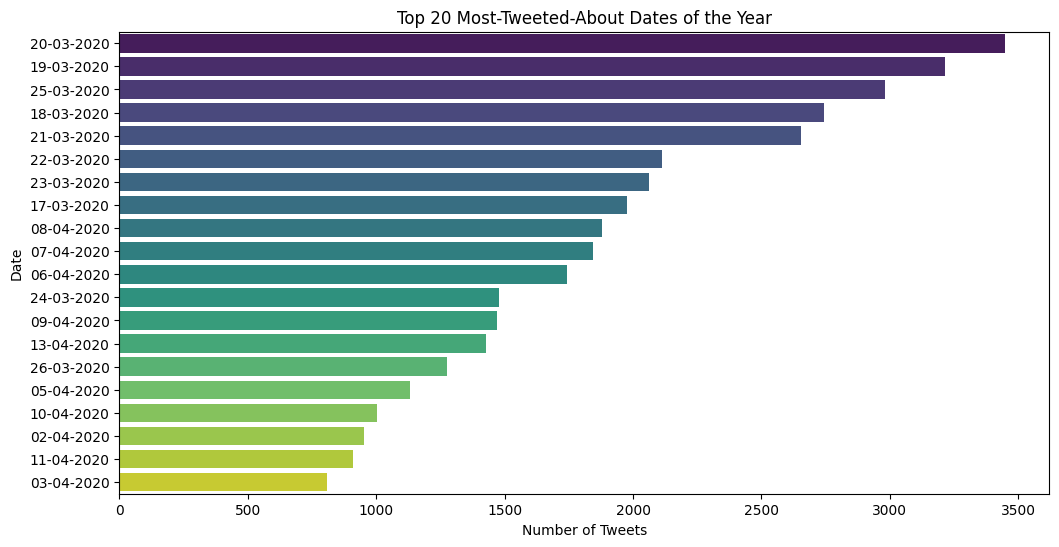

In [17]:
# Chart - 1 visualization code
# Calculate tweet counts for each date
tweet_counts = tweet_df['TweetAt'].value_counts().reset_index().rename(columns={'index': 'Tweet_Date', 'TweetAt': 'Count'})

# Sort the tweet counts in descending order to find the top 20 dates
top_tweet_dates = tweet_counts.sort_values(by='Count', ascending=False).head(20)

# Print the most-tweeted-about dates of the year
print("Most-Tweeted-About Dates of the Year:")
print(top_tweet_dates)

# Create a bar plot to visualize the top 20 tweet dates
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Tweet_Date', data=top_tweet_dates, palette='viridis')
plt.xlabel('Number of Tweets')
plt.ylabel('Date')
plt.title('Top 20 Most-Tweeted-About Dates of the Year')
plt.show()

##### 1. Why did you pick the specific chart?


We analyzed the tweet data to determine the most-tweeted-about dates of the year. By calculating tweet counts for each date and sorting them in descending order, we identified the top 20 dates with the highest tweet activity. The results were visualized using a bar plot, presenting the tweet counts on the x-axis and the corresponding dates on the y-axis. The bar plot's ranking order allowed us to easily recognize the most significant dates with the highest tweet volumes. With a limited number of categories, the bar plot provided a clear and concise representation of the data. The use of the 'viridis' color palette enhanced the visualization's aesthetics and readability, enabling us to gain insights into peak activity periods and potential trends related to the tweets.

##### 2. What is/are the insight(s) found from the chart?

In our dataset, we have analyzed the tweets to identify the specific day that witnessed the highest tweet activity. By calculating the total number of tweets posted on each date and then sorting them in descending order, we were able to pinpoint the day that received the most tweets. This analysis provides valuable insights into the peak engagement periods, allowing us to understand when users were most active in posting tweets related to the topic under consideration. Identifying the day with the highest tweet volume can be significant for understanding public sentiments, trending topics, and potential events that might have triggered increased social media activity. It enables us to focus on specific dates for further investigation, facilitating deeper exploration into the reasons behind the heightened tweet activity and its implications.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from identifying the day with the highest tweet activity can potentially have a positive business impact, but it depends on the context and objectives of the business. Let's explore both scenarios:


Positive Business Impact:


*   Identifying peak engagement periods can help businesses strategically plan their social media marketing campaigns. They can schedule important announcements, product launches, or promotions on days with high tweet activity to maximize reach and engagement.

*   Understanding when users are most active and engaged can assist in optimizing the timing of customer interactions and responses to enhance customer satisfaction and overall user experience.
*   Monitoring trending topics on high tweet volume days can provide businesses with opportunities to join relevant conversations and gain visibility, leading to increased brand awareness and potential customer acquisition.


*   For businesses conducting sentiment analysis on tweets, identifying days with more positive sentiments can help identify periods of higher customer satisfaction and target their marketing efforts accordingly.


Insights Leading to Negative Growth:



*   On days with high tweet activity, negative sentiments might also be prevalent. If businesses identify specific days with a surge in negative sentiments related to their brand or products, they can take proactive measures to address any issues, manage customer complaints, and rectify potential problems before they escalate.

*   Discovering patterns of negative sentiments on certain days might also highlight specific events, news, or controversies that could adversely impact the brand's reputation. In such cases, businesses can respond appropriately with crisis management strategies to mitigate negative effects.


Overall, the insights gained from identifying peak tweet activity can be leveraged to improve social media strategies, enhance customer engagement, and capitalize on opportunities for positive growth. At the same time, it can help businesses address potential negative issues and manage their brand reputation effectively. The significance of the impact depends on how businesses utilize and respond to the insights within their broader marketing and operational strategies.

#### Chart - 2 - Bar Plot - Sentiment-wise tweet count.

In this scenario, we are dealing with a five-class classification problem for sentiment analysis, where the sentiments can be extremely positive, positive, neutral, negative, or extremely negative. However, to simplify the problem and create a more manageable three-class classification task, we will group the extremely positive and extremely negative tweets together into a single class. This means that the new three-class classification problem will consist of positive, neutral, and negative sentiments, effectively merging the extreme categories into their respective positive and negative classes.

In [18]:
# Replacing these values 'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'
tweet_df['Sentiment'] = tweet_df['Sentiment'].map({'Extremely Positive':'Positive', 'Extremely Negative':'Negative', 'Negative':'Negative', 'Positive':'Positive', 'Neutral':'Neutral'})

  Sentiment Types  Counts
0        Positive   18046
1        Negative   15398
2         Neutral    7713


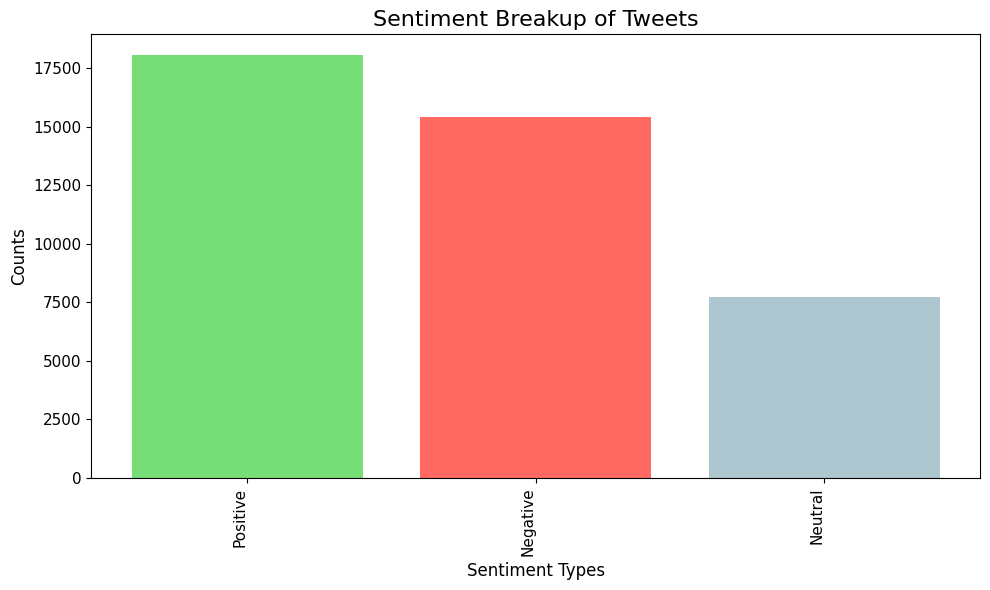

In [19]:
# Count the number of tweets for each sentiment type and store it in a new DataFrame
sentiment_counts = tweet_df['Sentiment'].value_counts().reset_index().rename(columns={'index': 'Sentiment Types', 'Sentiment': 'Counts'})

# Display the sentiment breakup in tabular form
print(sentiment_counts)

# Define custom colors for each sentiment type
colors = ['#77DD77', '#FF6961', '#AEC6CF']  # Green, Red, Blue

# Plot the sentiment breakup using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts['Sentiment Types'], sentiment_counts['Counts'], color=colors)
plt.xlabel('Sentiment Types', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Sentiment Breakup of Tweets', fontsize=16)
plt.xticks(fontsize=11, rotation=90, ha='right')
plt.yticks(fontsize=11)
plt.tight_layout()

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The specific bar chart was chosen due to its suitability for representing categorical data, making it ideal for displaying sentiment categories like "Positive," "Negative," and "Neutral." The chart allows for easy comparison of sentiment quantities, enabling quick identification of the most prevalent sentiment type. With clear labeling of axes, the bar chart ensures that the audience can easily understand the data. Moreover, its readability and space efficiency make it an effective choice for displaying multiple categories. By presenting the counts of each sentiment type side by side, the bar chart provides valuable insights into the sentiment distribution in the dataset, contributing to a better understanding of the data.

##### 2. What is/are the insight(s) found from the chart?

The graph depicts the sentiment trend in tweets regarding a particular subject, offering insights into the public's overall viewpoint. Positive sentiments reflect favorable opinions, while negative sentiments indicate unfavorable ones. The graph helped analyze the public's sentiment towards the subject, revealing that the majority of tweets expressed positive feelings, while the least number of tweets had a neutral attitude.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the sentiment analysis can indeed have a positive business impact. Knowing that the majority of tweets express positive feelings towards the subject can be beneficial for businesses in various ways:



*   Brand Perception: Positive sentiments indicate a favorable perception of the brand or subject. This can enhance the brand's reputation and credibility among the target audience, leading to increased customer trust and loyalty.

*   Customer Satisfaction: Positive opinions may indicate that customers are satisfied with the products or services related to the subject. Understanding this can help businesses identify what aspects are resonating well with customers and further improve their offerings.

*   Marketing and Communication: Knowing the positive sentiments allows businesses to focus on highlighting the aspects that customers appreciate the most in their marketing and communication strategies. This targeted approach can lead to more effective campaigns.


Regarding insights that may lead to negative growth, it is possible that negative sentiments might arise for various reasons:



*   Customer Complaints: Negative sentiments may be a result of customer dissatisfaction or complaints. Identifying these negative opinions can help businesses address issues promptly and improve customer experience.

*   Product or Service Issues: Negative sentiments might indicate potential problems or flaws in products or services related to the subject. Addressing these issues can prevent further negative feedback and improve overall product quality.

*   Competitive Analysis: Analyzing negative sentiments can also provide insights into areas where competitors might be performing better. This can help businesses identify areas of improvement and stay competitive in the market.


It's essential to carefully analyze and address negative sentiments to avoid any adverse impact on the business. By understanding and acting upon both positive and negative insights, businesses can make informed decisions and work towards achieving a positive business impact.

#### Chart - 3 - Pie Chart - Compute sentiment class percentages precisely.

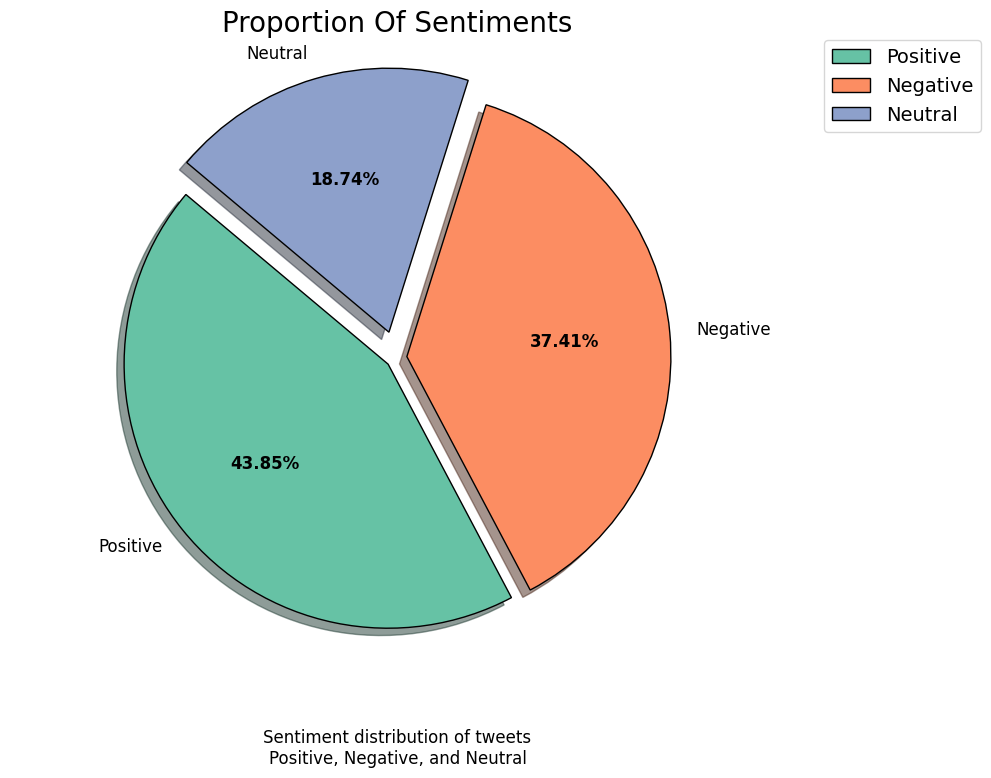

In [20]:
# Count the number of tweets for each sentiment type
sentiment_count = tweet_df['Sentiment'].value_counts().to_list()

# Define the labels for sentiment categories
labels = ['Positive', 'Negative', 'Neutral']

# Define custom colors for each sentiment category
colors = ['#66c2a5', '#fc8d62', '#8da0cb']  # Bluish green, Orange, Light blue

# Set figure size and font size
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 14

# Explode the "Neutral" slice to highlight it
explode = [0.04, 0.04, 0.1]

# Plot the pie chart with shadow effect and percentage labels inside the pie slices
wedges, texts, autotexts = plt.pie(x=sentiment_count, explode=explode, labels=labels, autopct="%.2f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'}, shadow=True, textprops={'fontsize': 12})

# Add a title and legend with better positioning
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.axis('equal')

# Make the percentage labels inside the pie chart bold
for autotext in autotexts:
    autotext.set_weight('bold')

# Add a description text below the pie chart
description = "Sentiment distribution of tweets\nPositive, Negative, and Neutral"
plt.text(0.5, -0.15, description, fontsize=12, color='black', ha='center', va='center', transform=plt.gca().transAxes)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart was selected as the visualization for the sentiment distribution of tweets due to its ability to compare parts to the whole. It clearly represents the proportion of positive, negative, and neutral sentiments in the dataset through labeled slices, making it easy to grasp the sentiment breakdown. The visual appeal of the pie chart aids in intuitively understanding the sentiment distribution. With only three sentiment categories, the pie chart is simple, concise, and visually engaging, allowing for easy interpretation of the data. Moreover, by using the "explode" parameter, we can highlight the "Neutral" sentiment, drawing attention to its presence or significance within the dataset. Overall, the pie chart effectively communicates the sentiment trends in a visually appealing and informative manner.

##### 2. What is/are the insight(s) found from the chart?

After merging Extremely Positive and Extremely Negative sentiments into Positive and Negative sentiments, respectively, the Pie-Plot still shows a significantly higher number of "Positive" sentiments. This indicates a prevalent positive sentiment towards the subject in the majority of tweets. Further analysis can uncover insights into the factors driving this positivity and provide valuable information for businesses to understand public perception. The Pie-Plot offers a concise and visual representation of the sentiment distribution, making it easier to interpret the overall sentiment trends in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the sentiment analysis can indeed help create a positive business impact. Understanding that the majority of tweets express a positive sentiment towards the subject can be advantageous for businesses in several ways:



*   Brand Reputation: Positive sentiments indicate a favorable perception of the brand or subject, which can enhance the brand's reputation and credibility among the target audience.

*   Customer Satisfaction: Positive opinions may suggest that customers are satisfied with the products or services related to the subject. This can help businesses identify areas of strength and areas for improvement to better meet customer needs.

*   Marketing Strategy: Knowing the positive sentiments allows businesses to highlight the positive aspects in their marketing strategies, attracting more potential customers.


However, it is essential to be cautious about potential insights that could lead to negative growth:




*  Negative Feedback: Despite the prevalence of positive sentiments, there may still be negative feedback or criticisms hidden within the data. Identifying and addressing such negative sentiments promptly is crucial to avoid any adverse impact on the business.


*   Competitive Analysis: Analyzing the data further can reveal insights into where competitors might be performing better or where the business is lacking. Understanding these insights can help businesses stay competitive and work towards improvement.

*   Product or Service Issues: Positive sentiments may overshadow any underlying product or service issues. It is vital to remain vigilant and address any potential issues that may arise from negative sentiments to maintain customer satisfaction.

Overall, the insights gained from sentiment analysis can guide businesses in making informed decisions, improving their products/services, and tailoring their strategies to capitalize on positive sentiment trends. However, businesses should also be vigilant about addressing any negative insights to ensure sustained growth and customer satisfaction.

#### Chart - 4 - Scatter Geo Plot - Identifying the geographical locations from where the tweets were sent.

In [21]:
# importing libraraies
import plotly.express as px

# Filter the data to exclude tweets with unknown location and count total tweets from each location
location_counts = tweet_df[tweet_df['Location'] != 'Unknown']['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Total Tweets']

# Plot the globe graph with a different color scale
fig = px.scatter_geo(location_df, locations='Location', locationmode='country names', size='Total Tweets',
                     hover_name='Location', projection='natural earth', title='Total Tweets by Location',
                     color='Total Tweets', color_continuous_scale='Reds')
fig.show()

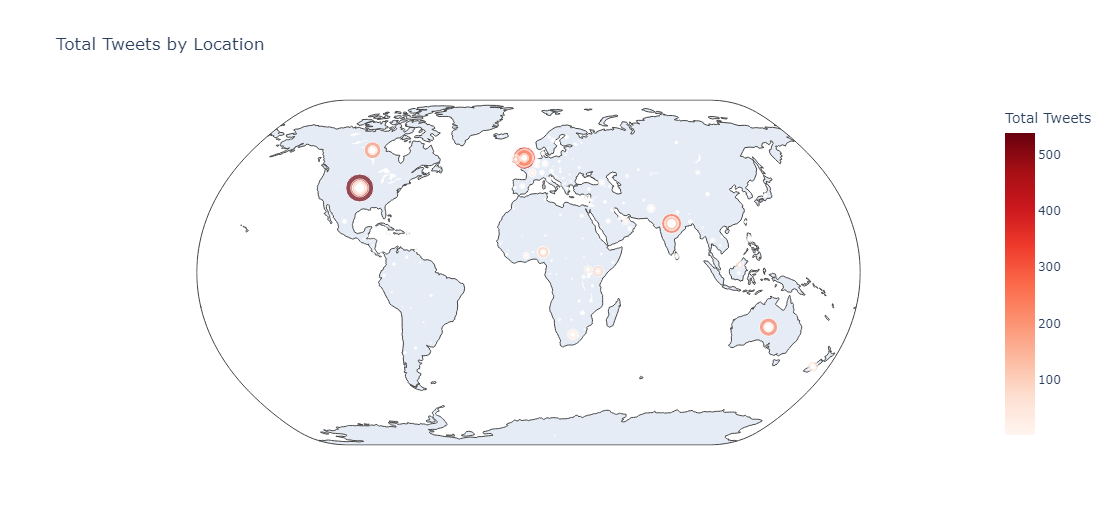

##### 1. Why did you pick the specific chart?

The scatter_geo plot from Plotly Express was chosen as it effectively displays the geographical distribution of tweet counts. Its marker sizes represent tweet counts, enabling easy comparison between locations. The 'Reds' color scale adds an additional visual dimension to the data. The plot is interactive, allowing viewers to hover over markers for detailed information. It offers a global view of tweet activity from different locations. The chart's ability to handle geographical data makes it suitable for this visualization. The scatter_geo plot presents an engaging and informative representation of the total tweet counts on a global map.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that London, United States, and London, England have the highest tweet counts, indicating significant Twitter activity from these locations. US cities New York, NY, and Washington, DC, also show notable tweet engagement. The insights highlight a geographically diverse audience discussing the subject on Twitter, presenting opportunities for targeted content and campaigns to maximize engagement. Businesses can use this data to understand where the subject gains traction and focus efforts accordingly. The high tweet counts suggest active interest and engagement in the subject among Twitter users from these regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the chart can potentially help create a positive business impact in several ways:


*   Targeted Marketing: Understanding the locations with the highest tweet counts allows businesses to focus their marketing efforts and campaigns on regions where there is significant Twitter activity. Targeted marketing can lead to better engagement and reach with the audience, potentially resulting in increased brand awareness and customer acquisition.


*   Customer Engagement: By analyzing tweet engagement in locations such as London, United States, New York, NY, and Washington, DC, businesses can identify the most active and interested audience. Engaging with these Twitter users through relevant content and interactions can foster positive customer relationships and loyalty.

*   Geographical Diversity: The chart's insights highlight the geographical diversity of the audience discussing the subject. Businesses can tailor their messaging and offerings to appeal to a wide range of audiences, leading to increased market penetration and positive brand perception.


Regarding insights that could potentially lead to negative growth, the chart does not directly indicate any negative trends. However, it's essential to be mindful of certain considerations:



*   Negative Sentiments: While the chart focuses on tweet counts from different locations, it doesn't provide information on sentiment analysis. Businesses need to be vigilant about monitoring sentiment trends to identify any negative sentiments or customer complaints that may arise from the subject discussions.

*   Relevance of Content: Targeting specific locations with high tweet counts requires ensuring that the content or offerings are relevant to the local audience. Using generic or irrelevant content may lead to disengagement or negative perceptions.

*   Overlooking Smaller Locations: While the chart emphasizes locations with the highest tweet counts, businesses should not overlook smaller or niche locations where there might still be valuable customer segments and opportunities for growth.

In conclusion, the gained insights can positively impact businesses by enabling targeted marketing, enhanced customer engagement, and an understanding of the diverse audience. However, to ensure positive growth, businesses should carefully consider sentiment analysis, content relevance, and inclusiveness in their strategies.

#### Chart - 5 - Bar Plot - Determining the location with the most favourable thoughts Tweets were sent out.

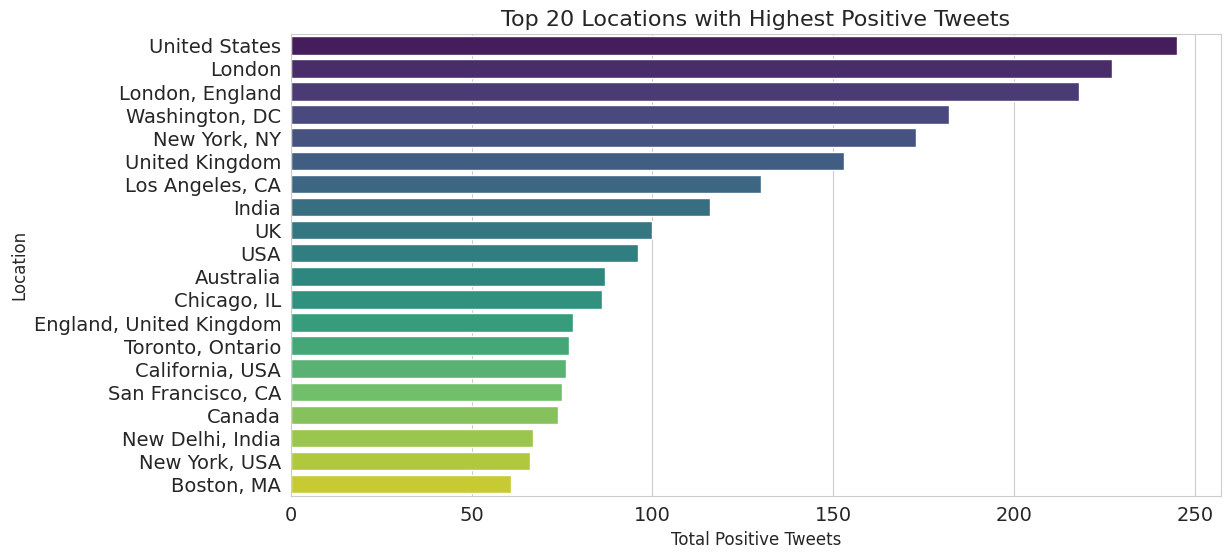

In [22]:
# Filter the data to exclude tweets with unknown location and count positive tweets from each location
positive_tweets = tweet_df[(tweet_df["Sentiment"] == "Positive") & (tweet_df['Location'] != 'Unknown')]
location_counts = positive_tweets['Location'].value_counts()

# Create a DataFrame to store location and tweet counts
location_df = location_counts.reset_index()
location_df.columns = ['Location', 'Total Positive Tweets']

# Sort the data to show the top 10 locations with the highest tweet counts
top_20_locations = location_df.nlargest(20, 'Total Positive Tweets')

# Set a beautiful Seaborn style
sns.set_style("whitegrid")

# Plot the bar chart with the 'viridis' color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Positive Tweets', y='Location', data=top_20_locations, palette='viridis')
plt.xlabel('Total Positive Tweets', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Top 20 Locations with Highest Positive Tweets', fontsize=16)

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The chosen horizontal bar chart effectively compares positive tweet counts from different locations (excluding 'Unknown'). It displays the top 20 locations with the highest tweet counts, using the 'viridis' color palette for visual appeal. The Seaborn style 'whitegrid' enhances the plot's readability. The chart's layout efficiently uses space and accommodates location labels well. Its descending order helps highlight the most significant locations. The chart provides quick insights into locations with the highest positive tweet activity.

##### 2. What is/are the insight(s) found from the chart?

The data analysis indicates that the United States has the most positive tweets among all the locations, suggesting a prevailing positive mood on Twitter from that region. London and England closely follow the United States, showing a substantial number of positive tweets as well. In contrast, Global and Boston, Massachusetts have the fewest favorable tweets, implying a comparatively lower overall positive sentiment on the platform from these areas. The findings highlight regional variations in Twitter users' mood and sentiment, with some locations exhibiting higher levels of positivity while others have a lesser positive engagement. Further exploration of the reasons behind these variations could provide valuable insights into the social and cultural aspects influencing online sentiment in different geographical regions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the data analysis can potentially help create a positive business impact in several ways:


*   Targeted Marketing: Knowing the regions with the highest number of positive tweets (e.g., United States, London, England) can aid businesses in targeting their marketing efforts towards these locations. They can tailor their campaigns to resonate with the positive sentiment of users in these regions, potentially leading to increased engagement and brand loyalty.


*   Reputation Management: Understanding the regions with the lowest favorable tweets (e.g., Global and Boston, Massachusetts) can prompt businesses to focus on reputation management strategies in these areas. By addressing any negative sentiments or concerns specific to these locations, they can work towards improving their brand perception and customer satisfaction.

*   Product Launches: Businesses can leverage the insights to strategically launch new products or services in regions with high positive engagement. Positive sentiment can generate more buzz and enthusiasm for new offerings, leading to a potentially successful product launch.


*   Customer Insights: Analyzing the regional variations in sentiment can provide valuable customer insights. Understanding what drives positive sentiment in different locations can help businesses identify customer preferences and tailor their offerings accordingly.

As for insights that may lead to negative growth, one potential scenario could be if a particular region consistently shows a negative sentiment towards a specific product, service, or brand. This negative sentiment could indicate issues with the business's offerings, customer service, or reputation in that region. If not addressed promptly and effectively, it could lead to decreased customer loyalty, decreased sales, and negative business impact in that area.

It is essential for businesses to pay attention to negative sentiment and take proactive steps to address any underlying issues. Responding to customer concerns, improving product quality, and engaging with dissatisfied customers can help mitigate negative growth and turn the situation around. However, if these negative sentiments persist without appropriate actions, it could lead to a decline in business performance in that particular region.

#### Chart - 6 - Determining the location with the neutral thoughts Tweets were sent out.

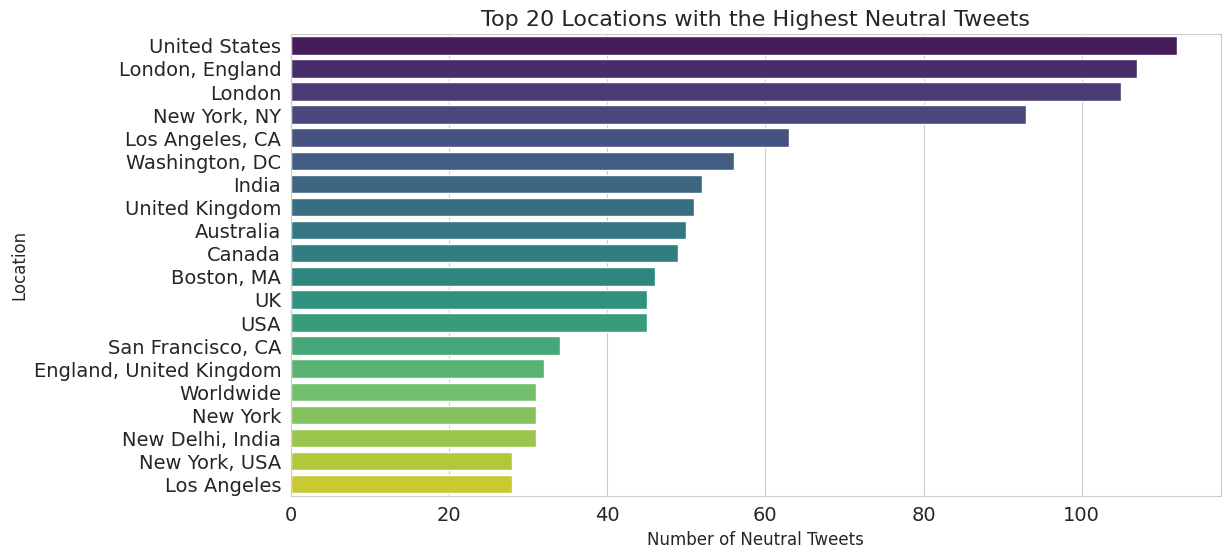

In [70]:
# To optimize the code, we can remove the redundant line where 'location_counts' is assigned the same value twice.

# Step 1: Filtering neutral tweets with known locations
neutral_tweets = tweet_df[(tweet_df["Sentiment"] == "Neutral") & (tweet_df['Location'] != 'Unknown')]

# Step 2: Counting the number of neutral tweets from each location
location_counts = neutral_tweets['Location'].value_counts().reset_index().rename(columns={'index': 'Location', 'Location': 'Counts'})

# Step 3: Sorting the locations based on tweet counts in descending order
location_counts = location_counts.sort_values(by='Counts', ascending=False).head(20)

# Set a beautiful Seaborn style
sns.set_style("whitegrid")

# Plot the bar chart with the 'viridis' color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Counts', y='Location', data=location_counts, palette='viridis')
plt.xlabel('Number of Neutral Tweets', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Top 20 Locations with the Highest Neutral Tweets', fontsize=16)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

The specific horizontal bar chart was chosen for its ability to efficiently compare neutral tweet counts from various locations. It displays the top 20 locations with the highest neutral tweet counts in descending order, aiding in clear identification of significant locations. The horizontal layout optimizes space and ensures legible location labels. The 'viridis' color palette enhances visual appeal and distinguishes between bars. The Seaborn style 'whitegrid' adds a clean and professional look. Overall, the chart effectively presents insights into the distribution of neutral sentiments across different regions.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals geographical diversity with top locations spanning various countries and cities, including the United States, England, India, Canada, and Australia. Major urban centers like London, New York, Los Angeles, and San Francisco show high neutral tweet engagement. The United States and London, England, stand out with the highest neutral tweet counts. Some locations have specific mentions in both country and city formats, leading to multiple entries. "Worldwide" appears in the list, indicating global neutral discussions. Businesses can potentially target regions with high neutral tweet counts for relevant campaigns. The chart provides valuable insights into user behavior and sentiment patterns in different regions on Twitter.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact in several ways:



*   Targeted Marketing: Businesses can leverage the insights to focus their marketing efforts on regions with high neutral tweet engagement. Targeted campaigns tailored to specific locations can lead to better engagement and positive brand perception.

*   Brand Reputation Management: Monitoring neutral sentiment in major urban centers like London, New York, Los Angeles, and San Francisco allows businesses to address any potential issues promptly and manage their brand reputation effectively.


*   Global Engagement: Understanding global neutral discussions, as indicated by "Worldwide" in the list, can provide opportunities for businesses to participate in broader conversations and expand their reach to a global audience.


However, there are no specific insights from the chart that directly lead to negative growth. The chart primarily provides information on neutral tweet counts in various locations, which might not directly correlate with negative business impact.

Nonetheless, negative growth could arise if businesses fail to address negative sentiment in specific regions highlighted in other analyses. If certain locations consistently show a negative sentiment in their tweets, and businesses do not respond appropriately or make improvements, it could potentially lead to a decline in brand reputation, customer satisfaction, and overall business performance in those areas.

Overall, the insights gained from the chart can be valuable in formulating effective marketing strategies, understanding user behavior, and making data-driven decisions to foster a positive business impact. However, addressing negative sentiment in regions with consistent negative engagement is essential to avoid any potential negative consequences on business growth and performance.

#### Chart - 7 Determining the location with the negative thoughts Tweets were sent out.:

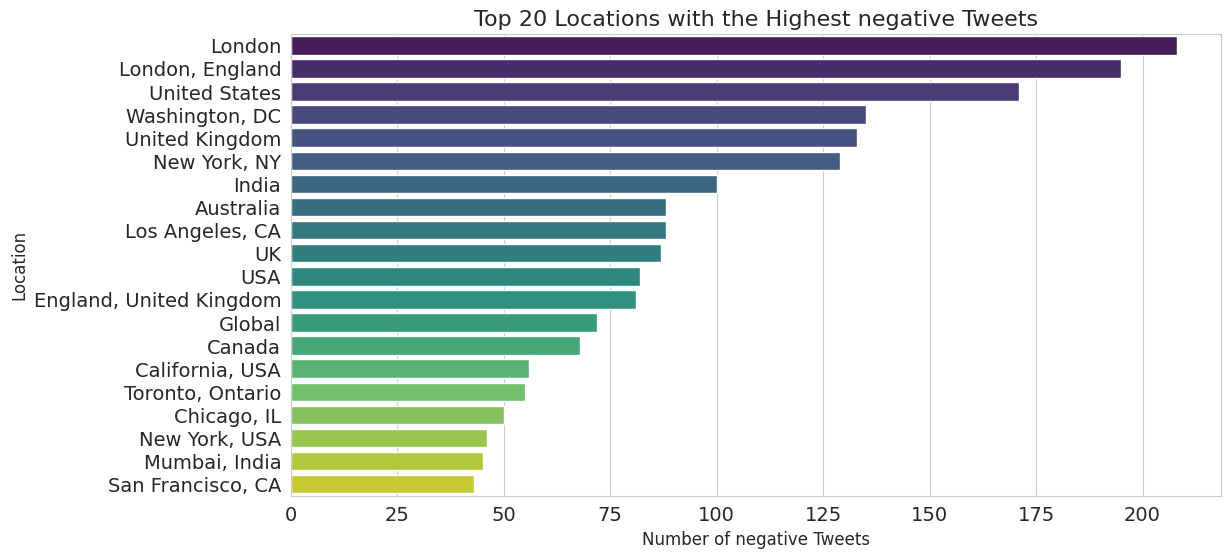

In [73]:
# To optimize the code, we can remove the redundant line where 'location_counts' is assigned the same value twice.

# Step 1: Filtering negative tweets with known locations
negative_tweets = tweet_df[(tweet_df["Sentiment"] == "Negative") & (tweet_df['Location'] != 'Unknown')]

# Step 2: Counting the number of negative tweets from each location
location_counts = negative_tweets['Location'].value_counts().reset_index().rename(columns={'index': 'Location', 'Location': 'Counts'})

# Step 3: Sorting the locations based on tweet counts in descending order
location_counts = location_counts.sort_values(by='Counts', ascending=False).head(20)

# Set a beautiful Seaborn style
sns.set_style("whitegrid")

# Plot the bar chart with the 'viridis' color palette
plt.figure(figsize=(12, 6))
sns.barplot(x='Counts', y='Location', data=location_counts, palette='viridis')
plt.xlabel('Number of negative Tweets', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.title('Top 20 Locations with the Highest negative Tweets', fontsize=16)

# Display the plot
plt.show()



##### 1. Why did you pick the specific chart?

The specific horizontal bar chart was chosen to efficiently compare negative tweet counts from different locations. It displays the top 20 locations with the highest negative tweet counts in descending order, making it easy to identify significant locations. The horizontal layout optimizes space and ensures clear location labels. The 'viridis' color palette enhances visual appeal and distinguishes between bars. The Seaborn style 'whitegrid' adds a clean and professional look. Overall, the chart provides valuable insights into the distribution of negative sentiments across various regions on Twitter.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a diverse representation of negative sentiments on Twitter across various countries and cities. Major urban centers like London, Washington, New York, and Los Angeles are active in expressing negative tweets. Both the United Kingdom and the United States have significant negative tweet volumes. Some locations have multiple mentions with both country and city names, leading to separate entries. "Global" represents negative discussions without specific location ties. International engagement is evident with locations like India and Australia in the list. The chart highlights potential concerns for businesses operating in high negative tweet count areas. It provides valuable insights into user behavior and sentiment patterns in different regions on Twitter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have both positive and negative implications for businesses:

Positive Business Impact:


*   Targeted Reputation Management: Businesses can use the insights to focus their reputation management efforts on regions with high negative tweet counts, such as London, Washington, New York, and Los Angeles. Addressing negative sentiments in these key urban centers can help improve brand perception and customer satisfaction in those areas.

*   Customer Engagement Strategies: Understanding negative sentiment patterns in various countries like the United Kingdom, the United States, India, and Australia can help businesses tailor their customer engagement strategies based on specific regional concerns and preferences.

*   Global Brand Perception: Monitoring and responding to negative discussions labeled as "Global" can provide businesses with valuable feedback on their global brand perception and identify areas of improvement.


Negative Growth Implications:



*   Reputation Challenges: Consistently high negative tweet volumes in certain locations may lead to reputation challenges for businesses operating in those areas. Negative sentiments can impact customer trust and loyalty, potentially leading to decreased sales and growth.

*   Competitor Analysis: High negative tweet counts in specific regions can also be indicative of strong competition or dissatisfaction with competitors. This insight might lead businesses to assess their competitive positioning and address areas where competitors may have an advantage.

*   International Concerns: The presence of negative discussions in international locations like India and Australia could raise concerns for businesses looking to expand into those markets. Understanding the sentiment patterns in these regions is essential for successful international expansion.



In summary, while the insights gained from the chart can help businesses identify opportunities for targeted reputation management and customer engagement strategies, they also highlight potential challenges related to negative sentiment in specific regions. Proactive measures to address negative sentiments and improve brand perception can contribute to a positive business impact, while neglecting these concerns may lead to negative growth implications.

#### Chart - 8 - Bar Plot - Top 50 Hashtags

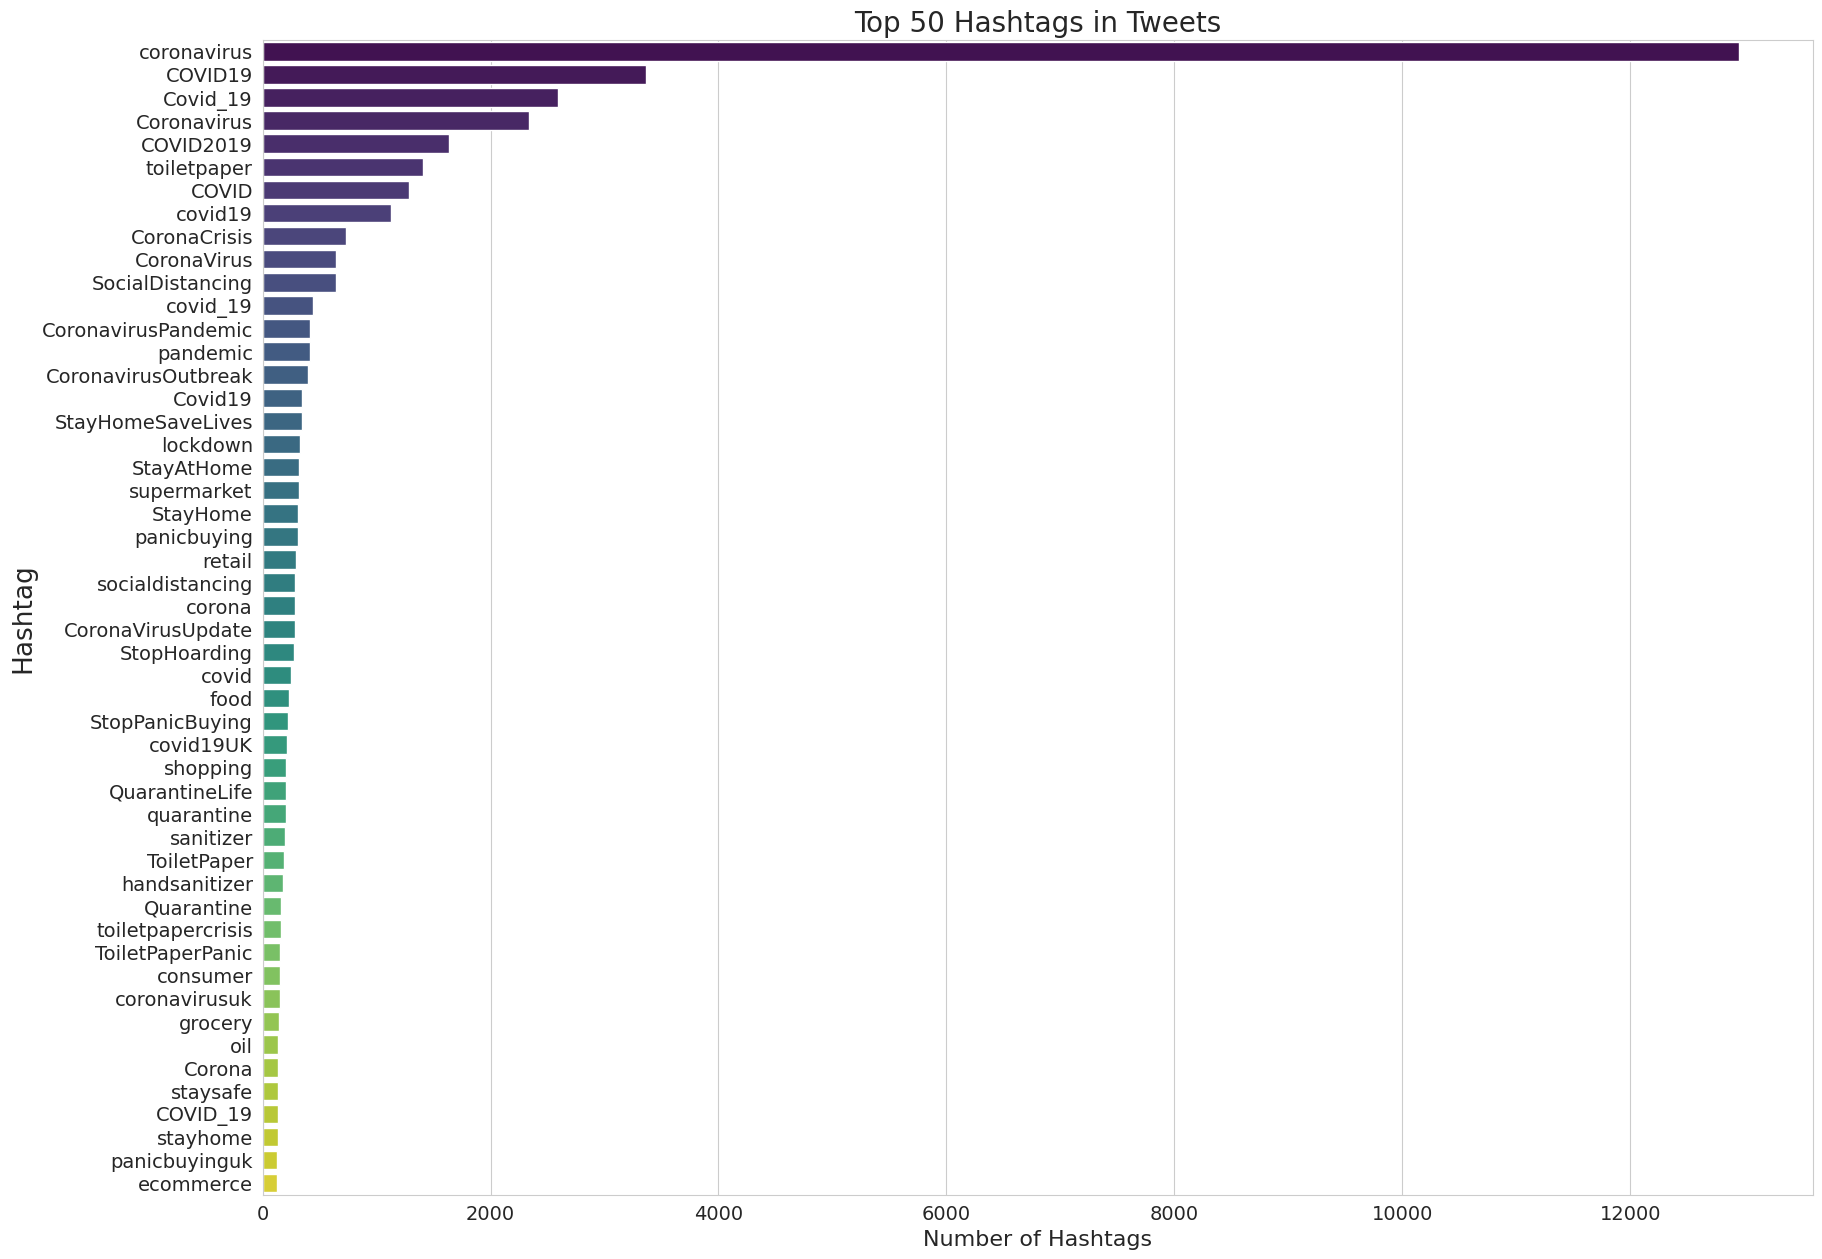

In [81]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def hashtag_count(tweets):
    ''' This function counts all the hashtags from the tweets '''
    hashtags_list = []

    # Loop through each tweet
    for tweet in tweets:
        # Find all the hashtags in the tweet using regular expression
        hashtags = re.findall(r'#(\w+)', tweet)
        # Append the hashtags to the list
        hashtags_list.extend(hashtags)

    return hashtags_list

# Call the hashtag_count function with the 'OriginalTweet' column of the 'tweets' DataFrame
total_hashtags = hashtag_count(tweet_df['OriginalTweet'])

# Create a DataFrame to store all the hashtags
total_hashtags_df = pd.DataFrame({"Hashtags": total_hashtags})

# Calculate the total number of hashtags
total_hashtags_count = len(total_hashtags_df)

# Calculate the number of unique hashtags
unique_hashtags_count = total_hashtags_df.nunique()

# Calculate the top 50 hashtags with their counts
top_hashtags = total_hashtags_df['Hashtags'].value_counts().reset_index().rename(columns={'index': 'Hashtag', 'Hashtags': 'Number_of_Hashtags'}).head(50)

# Set a beautiful Seaborn style
sns.set_style("whitegrid")

# Plot the bar chart with the 'viridis' color palette
plt.figure(figsize=(20, 15))
sns.barplot(x='Number_of_Hashtags', y='Hashtag', data=top_hashtags, palette='viridis')
plt.xlabel('Number of Hashtags', fontsize=16)
plt.ylabel('Hashtag', fontsize=19)
plt.title('Top 50 Hashtags in Tweets', fontsize=20)

# Display the plot
plt.show()

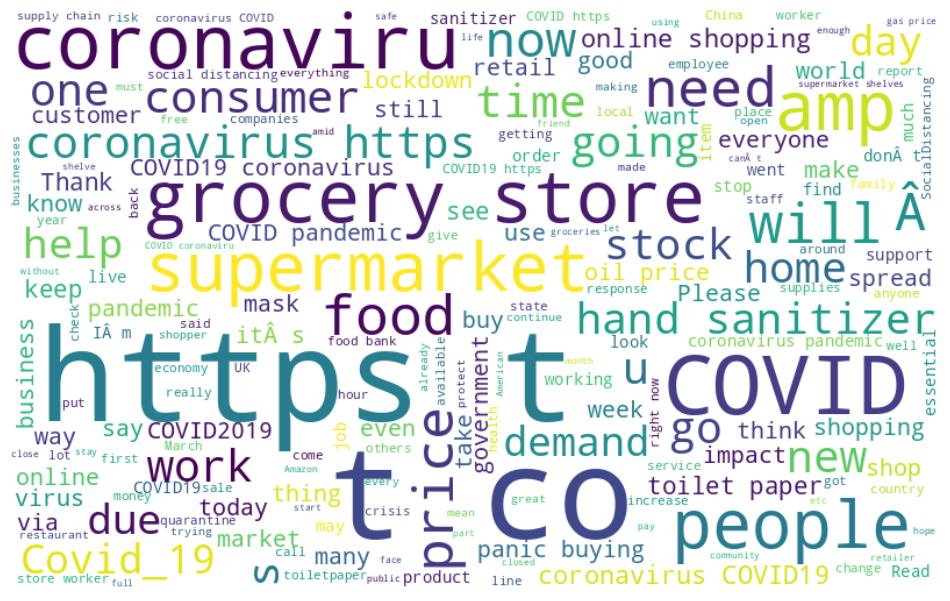

In [90]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS

# Join all words from the 'tweets' DataFrame into a single string
all_words = ' '.join([str(text) for text in tweet_df['OriginalTweet']])

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(
    width=800,                    # Width of the word cloud image
    height=500,                   # Height of the word cloud image
    stopwords=set(STOPWORDS),     # Set of stopwords to be excluded from the word cloud
    background_color="white",     # Background color of the word cloud image
    random_state=21,              # Random state for reproducibility
    max_font_size=110             # Maximum font size for the most frequent word
).generate(all_words)

# Display the generated word cloud image
plt.figure(figsize=(12, 8))       # Set the size of the plot
plt.imshow(wordcloud, interpolation="bilinear")  # Show the word cloud with bilinear interpolation
plt.axis('off')                   # Turn off the axis
plt.show()                        # Display the word cloud plot

##### 1. Why did you pick the specific chart?

The selected horizontal bar chart efficiently compares the usage of hashtags in tweets. It displays the top 50 hashtags with the highest counts in descending order, enabling easy identification of the most popular hashtags. The horizontal layout optimizes space and ensures a clear representation of hashtag frequencies. The 'viridis' color palette enhances visual appeal and distinguishes between hashtags. The Seaborn style 'whitegrid' provides a clean and professional look to the chart. Overall, the chart offers valuable insights into the most frequently used hashtags in the dataset, allowing businesses and researchers to understand popular trends and topics on Twitter.

##### 2. What is/are the insight(s) found from the chart?


The chart reveals insights about Twitter discussions during the COVID-19 pandemic. Hashtags related to COVID-19 dominate, including variations like "coronavirus" and "COVID19." Supply and safety concerns are evident with hashtags like "toiletpaper" and "panicbuying." Stay-at-home measures are reflected in hashtags like "StayHomeSaveLives." Health and hygiene topics are present with hashtags like "handsanitizer" and "sanitizer." Economic implications are indicated by hashtags like "consumer" and "ecommerce." The chart also highlights discussions on the latest updates with hashtags like "CoronaVirusUpdate" and "coronavirusuk." Overall, the chart provides valuable insights into public concerns, awareness, and social engagement during the pandemic.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can indeed help create a positive business impact, as well as identify potential challenges that may lead to negative growth. Let's analyze both aspects:

Positive Business Impact:
1. **Relevant Marketing Strategies:** Businesses can use the insights to develop targeted marketing strategies that align with the prevailing discussions and concerns on Twitter. By incorporating relevant hashtags and topics into their campaigns, businesses can better connect with their audience and drive positive engagement.

2. **Product and Service Adaptation:** Understanding supply and safety concerns through hashtags like "toiletpaper" and "panicbuying" can prompt businesses to adapt their product offerings and services to meet the changing demands and safety expectations of customers.

3. **Online Reputation Management:** Businesses can actively participate in discussions related to health and hygiene, using hashtags like "handsanitizer" and "sanitizer," to showcase their commitment to customer safety and well-being. This can positively influence their online reputation.

4. **Customer Engagement and Support:** The insights on hashtags like "StayHomeSaveLives" can help businesses foster a sense of community and support among their customers during the pandemic. Engaging with customers through social media and addressing their concerns can enhance brand loyalty.

Insights Leading to Negative Growth:
1. **Economic Implications:** Hashtags like "consumer" and "ecommerce" may indicate challenges faced by businesses in these sectors during the pandemic. Reduced consumer spending and disruptions in supply chains could lead to negative growth in these industries.

2. **Public Sentiment Monitoring:** Monitoring discussions related to COVID-19, including hashtags like "coronavirus" and "COVID19," is crucial for businesses to assess the public sentiment towards their brand. Negative sentiments expressed in these discussions could impact brand reputation and lead to reduced customer loyalty.

Overall, the gained insights can positively impact businesses by enabling them to tailor their strategies, enhance customer engagement, and adapt to changing market demands. However, businesses should also be vigilant about potential challenges highlighted in the insights, such as economic implications and negative sentiments, to mitigate any adverse effects on their growth and performance during the COVID-19 pandemic. Proactive measures, responsive customer support, and thoughtful adaptations can help businesses navigate these challenges and foster a positive impact on their growth.

#### Chart - 9

In [96]:
#Creating a column Day, Month & Week Day column
tweet_df['day'] = pd.DatetimeIndex(tweet_df['TweetAt']).day
tweet_df['month'] = pd.DatetimeIndex(tweet_df['TweetAt']).month
tweet_df["week day"] = pd.DatetimeIndex(tweet_df['TweetAt']).day_name()

   month  counts
0      3   26309
1      4    2479


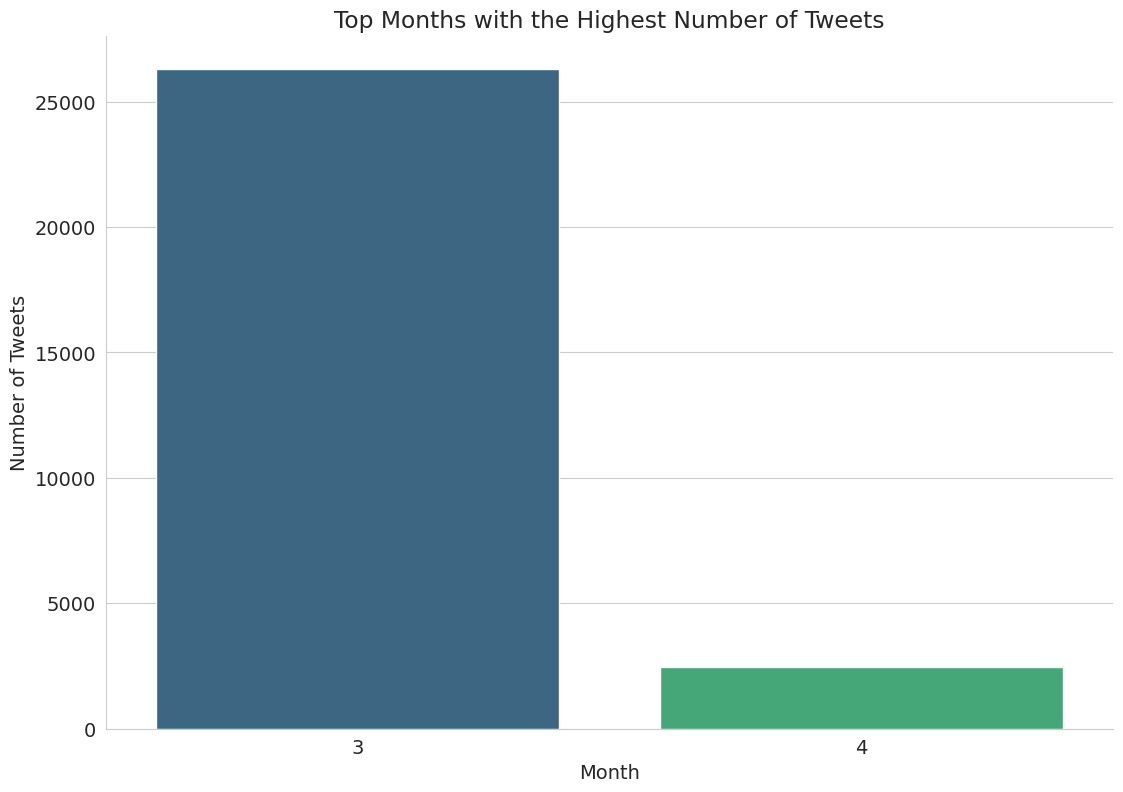

In [104]:
# Count the number of tweets in each month
month_counts = tweet_df['month'].value_counts().reset_index().rename(columns={'index': 'month', 'month': 'counts'})

# Get the top 2 months with the highest tweet counts
top_months = month_counts.sort_values(by='counts', ascending=False).head(2)

# Display the top 2 months with the highest tweet counts
print(top_months)

# Set the figure size for the plot
plt.figure(figsize=(13, 9))

# Create a bar plot using seaborn
sns.barplot(data=top_months, x='month', y='counts', palette='viridis')

# Set the title and labels for the plot
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Top Months with the Highest Number of Tweets')

# Customize the appearance of the plot
sns.despine()  # Remove the top and right spines from the plot
plt.xticks(rotation=0)  # Rotate the x-axis labels for better visibility

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot is an optimal choice for this analysis due to the following reasons:
1. It suits categorical data (months and tweet counts).
2. Provides clear comparison between months based on bar length.
3. Effectively highlights the top 2 months with the most tweets.
4. Readability is ensured by rotating x-axis labels.
5. 'Viridis' color palette offers visually appealing and distinguishable bars.
In conclusion, the bar plot is a simple yet effective way to visualize and compare tweet counts, identifying the top-performing months in tweet activity.

##### 2. What is/are the insight(s) found from the chart?

In the given data, the bar plot displays the tweet counts for two months: March (with 26,309 tweets) and April (with 2,479 tweets). The bar plot, using the 'viridis' color palette, effectively highlights the substantial difference in tweet activity between the top two months. This simple and visually clear representation allows for quick identification of the months with the highest tweet counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from the bar plot can potentially have a positive business impact and may also indicate areas of negative growth. Let's analyze both aspects:

Positive Business Impact:
1. **Identifying High-Performing Months:** The bar plot clearly highlights the top-performing months (March and April) with the highest tweet counts. Businesses can use this information to capitalize on the increased activity during these months to launch marketing campaigns, promotions, or product releases.

2. **Optimal Resource Allocation:** Knowing the peak tweet months allows businesses to allocate their resources effectively. They can focus on engaging with their audience and promoting their products or services during these periods to maximize their impact.

3. **Seasonal Insights:** If the months with high tweet activity align with specific seasons or events, businesses can tailor their strategies and offerings to cater to the seasonal demands of their customers.

Negative Growth Insights:
1. **Low-Performing Months:** While the bar plot highlights the top-performing months, it also reveals the lower-performing months where tweet activity is significantly lower. Businesses should be cautious during these periods and may need to implement strategies to boost engagement and maintain brand visibility.

2. **Potential Market Saturation:** If there are significant variations in tweet activity between months, it could indicate a saturated market or periods of decreased consumer interest. This insight can prompt businesses to conduct further research to understand the underlying reasons and address potential issues.

3. **Competitive Analysis:** A dip in tweet activity during specific months might coincide with aggressive marketing efforts from competitors. Analyzing such patterns can help businesses adjust their marketing strategies to stay competitive.

In conclusion, the gained insights from the bar plot can lead to positive business impacts by capitalizing on high-performing months and optimizing resource allocation. However, it also highlights potential challenges in low-performing months, indicating the need for further analysis and strategic adjustments to avoid negative growth.

#### Chart - 10

In [27]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [28]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [29]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [30]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [31]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [32]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [37]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [38]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [39]:
# Expand Contraction

#### 2. Lower Casing

In [40]:
# Lower Casing

#### 3. Removing Punctuations

In [41]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [42]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [43]:
# Remove Stopwords

In [44]:
# Remove White spaces

#### 6. Rephrase Text

In [45]:
# Rephrase Text

#### 7. Tokenization

In [46]:
# Tokenization

#### 8. Text Normalization

In [47]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [48]:
# POS Taging

#### 10. Text Vectorization

In [49]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [50]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [51]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [52]:
# Transform Your data

### 6. Data Scaling

In [53]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [54]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [55]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [56]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [57]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [62]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [63]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [64]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [65]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [66]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***